4.69253055512673 1.4229109221974754


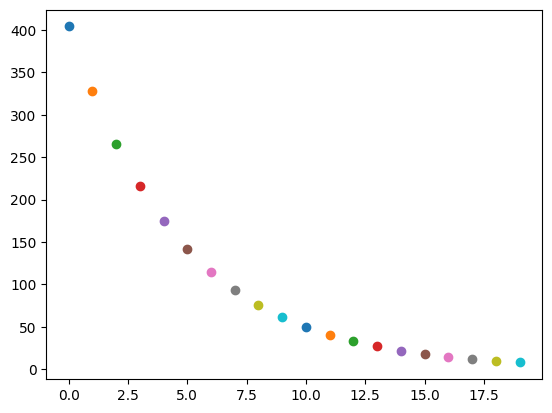

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
#D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c


fn = '../data/gas.csv'
df = pd.read_csv(fn)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

X = df['vehicle_tons']
Y = df['gas_pumped']
m = 0
c = 0
n = len(X)
L = 0.01
e = 20
line_history = []
for i in range(e):
    Y_pred = m*X + c
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m-L*D_m
    c = c-L*D_c
    plt.scatter(i,sum(X * (Y - Y_pred)))
    line_history.append([m,c,sum(X * (Y - Y_pred))])

print(m,c)
#print(line_history)
plt.show()


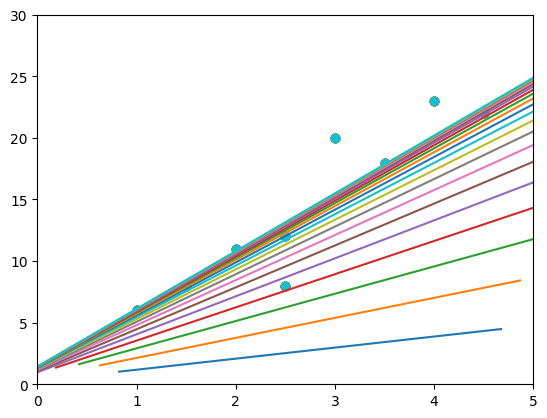

In [10]:
for line in line_history:
    plt.scatter(X,Y)
    m,c,loss = line
    abline(m,c)
plt.xlim(0,5)
plt.ylim(0,30)
plt.show()


404.0


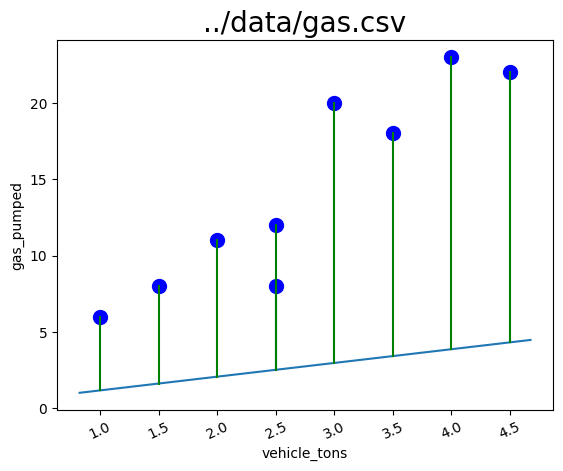

327.6777777777778


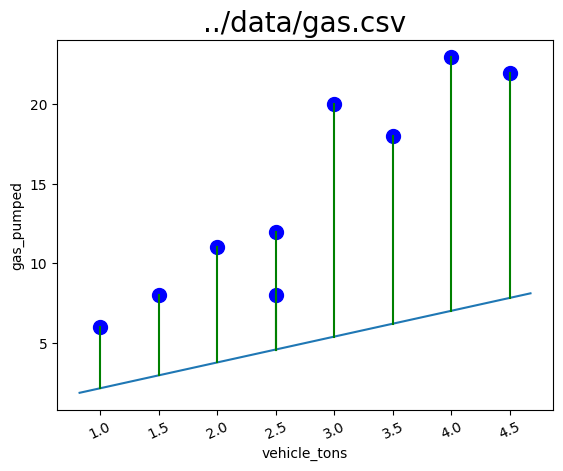

265.7944506172839


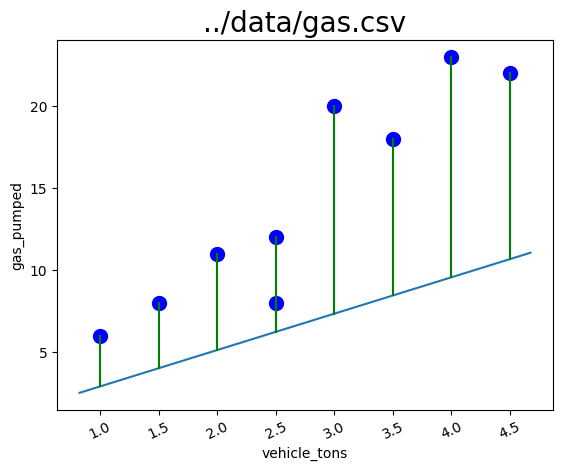

215.6183691186557


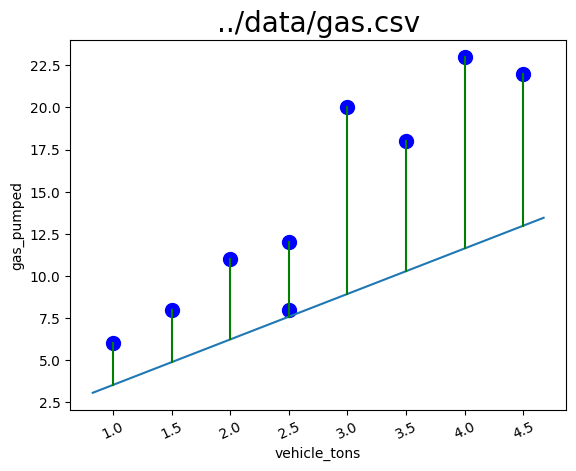

174.93467621438234


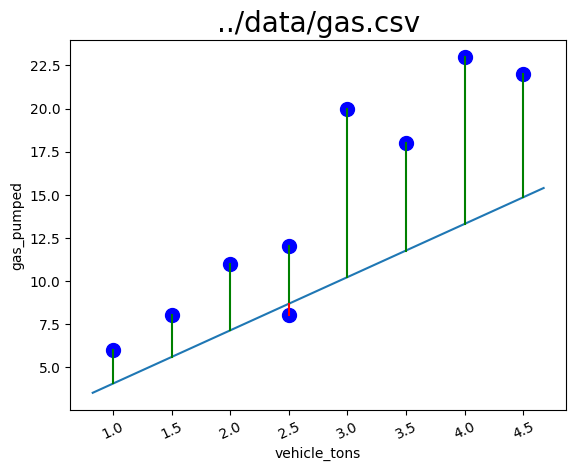

141.9475368201378


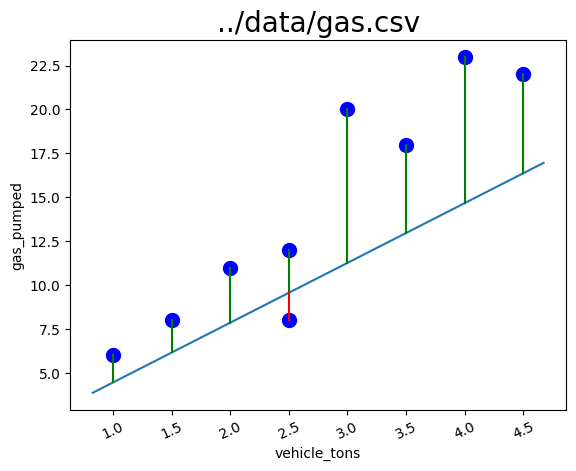

115.2008643567513


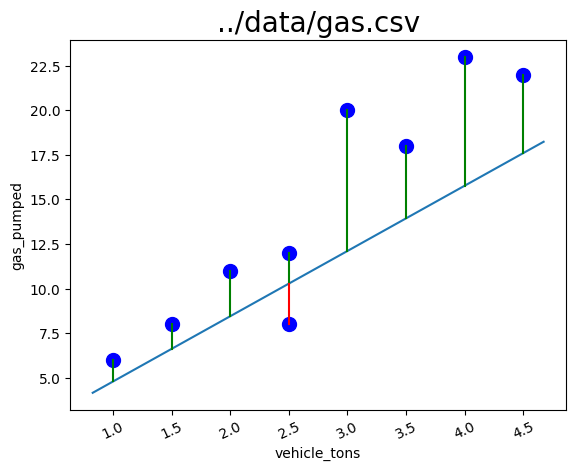

93.51404477725258


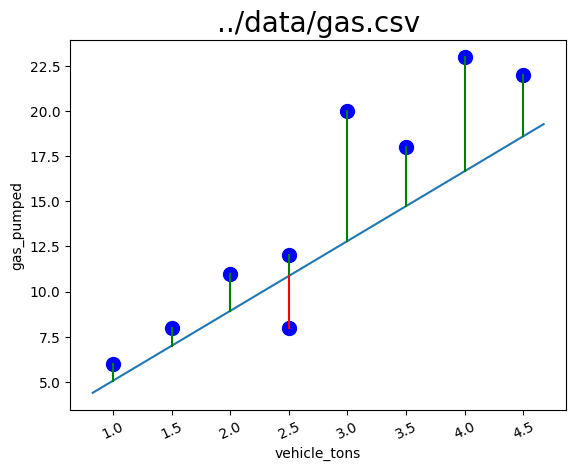

75.92982076721263


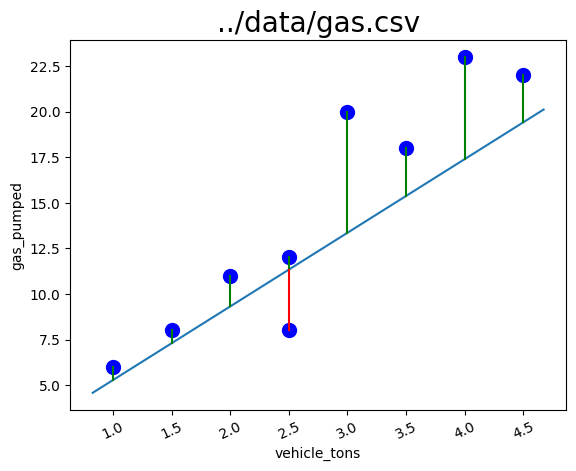

61.672035572658274


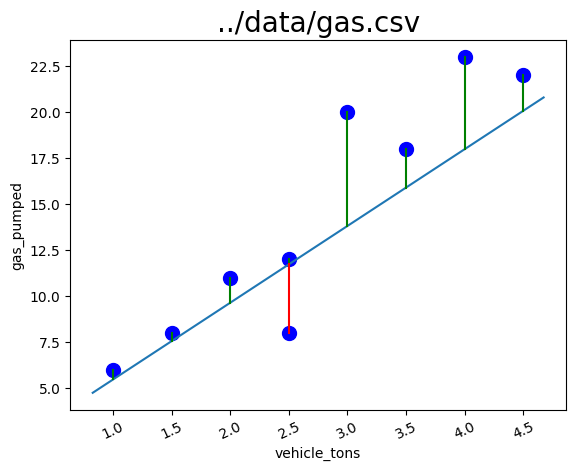

50.11137114299653


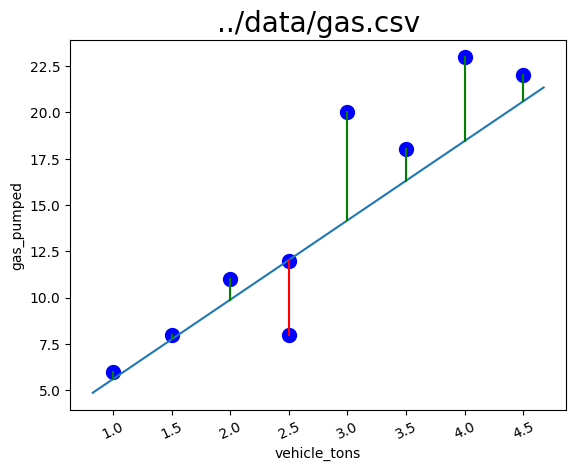

40.73756816912169


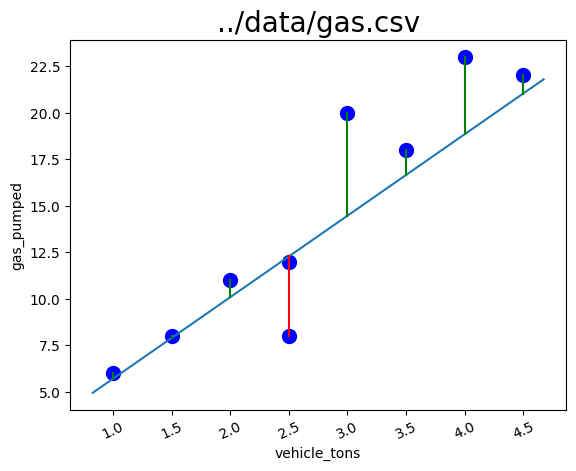

33.13690172692557


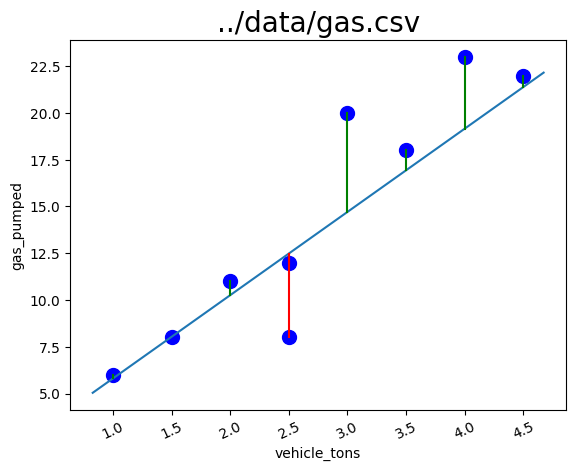

26.97391823441666


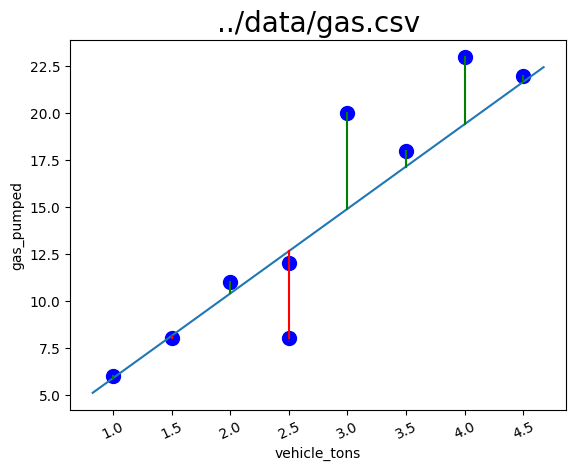

21.97662753765566


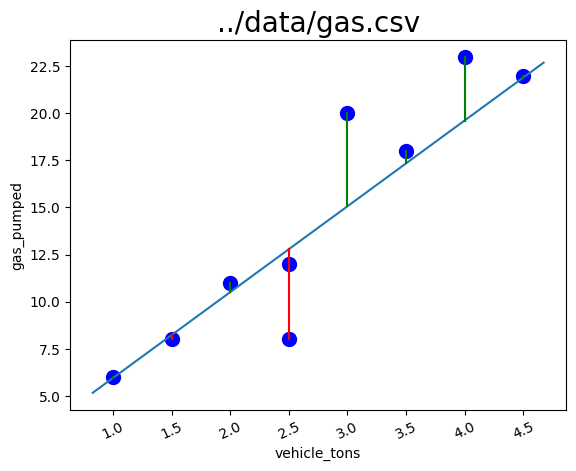

17.924496460330552


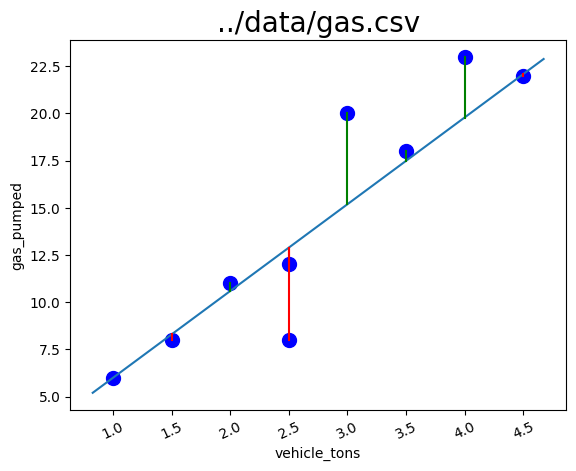

14.638713816697312


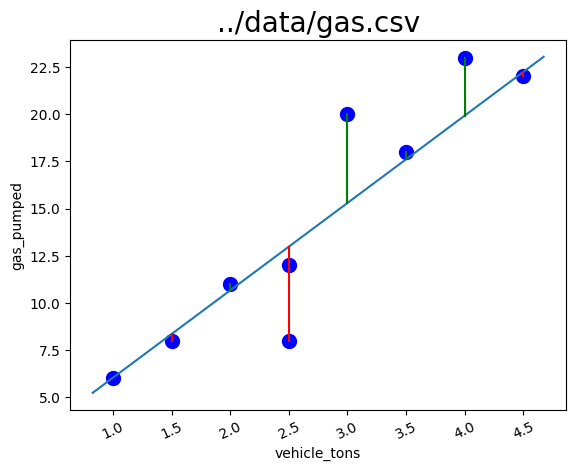

11.97429715672967


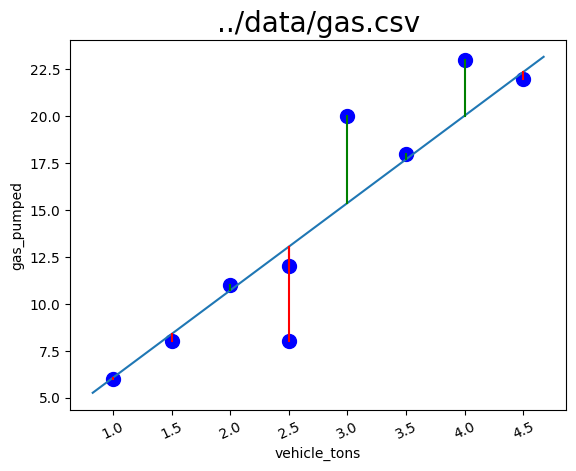

9.813692811835585


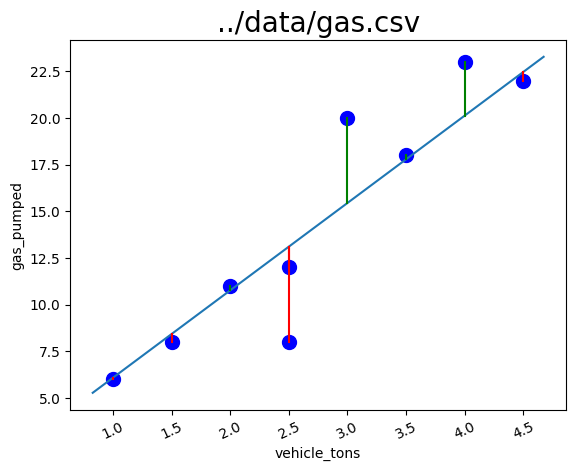

8.061586728207297


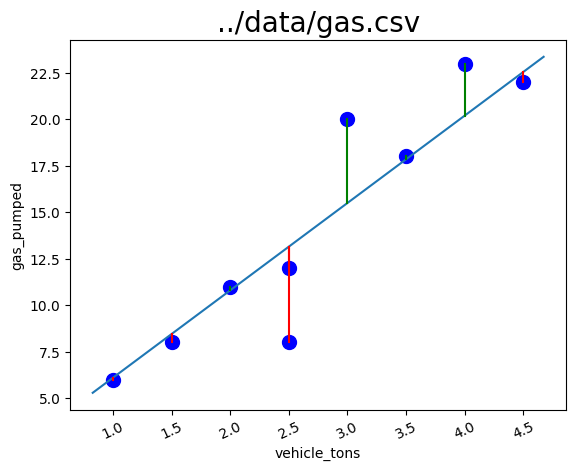

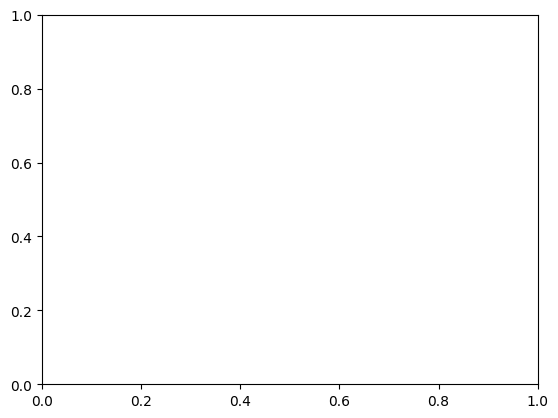

In [11]:

for line in line_history:
    plt.scatter(df[df.columns[0]],df[df.columns[1]], color = 'b',s = 100)
    plt.xticks(rotation = 25)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.title(fn, fontsize = 20)
    m,c,loss = line
    abline(m,c)
    for index, row in df.iterrows():
        #print(row[0],row[1],row[0],m*row[0] + c)
        y2 = (m*row[0] + c)
        if y2 > row[1]:
            color = 'red'
        else:
            color = 'green'
       
        plt.plot([row[0],row[0]],[row[1],y2],color=color)# Draw the loss distances format=[x1,x2],[y1,y2]
    print(loss)
    plt.show()
    plt.cla()